<a href="https://colab.research.google.com/github/aswinmkv/Python_Portfolio/blob/main/Walmart_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("walmart_data.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


### Structure and characteristics of Data

In [ ]:
df.shape

(550068, 10)

In [ ]:
# columns and type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# Description of data
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
# To check the number of null values in the dataset
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
# converting the below mentioned categories to object since these are masked values
columns=["Occupation","Marital_Status","Product_Category"]
df[columns]=df[columns].astype("object")
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

### Data Exploration

In [ ]:
# Age vs product Sold
df1=pd.crosstab(df["Age"],df["Product_Category"],margins=True,margins_name="Total_Transaction%",normalize=True)*100
df1.reset_index()

Product_Category,Age,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Total_Transaction%
0,0-17,0.651738,0.146346,0.218155,0.137801,0.787175,0.072536,0.009635,0.410495,0.002909,...,0.022724,0.020361,0.007090,0.029087,0.041631,0.001091,0.004908,0.010726,0.016362,2.745479
1,18-25,4.901576,0.804991,0.856258,0.447763,5.185177,0.681552,0.087444,3.256143,0.011453,...,0.079808,0.137438,0.041813,0.186159,0.290510,0.007454,0.061629,0.049994,0.085262,18.117760
2,26-35,10.589418,1.623072,1.392919,0.762088,11.175527,1.542537,0.300145,8.045551,0.027997,...,0.199248,0.381044,0.102533,0.431219,0.748635,0.023088,0.189431,0.102351,0.163253,39.919974
3,36-45,5.026288,0.892981,0.700641,0.427947,5.340612,0.708821,0.147073,4.235113,0.019452,...,0.180705,0.227245,0.056720,0.253605,0.355411,0.024542,0.127621,0.058175,0.091989,19.999891
4,46-50,1.904128,0.382680,0.250151,0.179978,2.176276,0.294873,0.059447,1.937215,0.005999,...,0.094534,0.100169,0.027088,0.109441,0.159798,0.017271,0.063810,0.027088,0.041268,8.308246
5,51-55,1.645069,0.323778,0.167979,0.123257,1.798505,0.263604,0.048358,1.697972,0.005272,...,0.078718,0.087807,0.027997,0.092352,0.122167,0.019452,0.076900,0.024361,0.036359,6.999316
6,55+,0.801901,0.164525,0.088535,0.057811,0.975698,0.156708,0.024361,1.128588,0.001454,...,0.061811,0.054721,0.013635,0.041631,0.068537,0.012180,0.043813,0.018725,0.029087,3.909335
7,Total_Transaction%,25.520118,4.338373,3.674637,2.136645,27.438971,3.720631,0.676462,20.711076,0.074536,...,0.717548,1.008784,0.276875,1.143495,1.786688,0.105078,0.568112,0.291419,0.463579,100.000000


<Axes: xlabel='Age', ylabel='Purchase'>

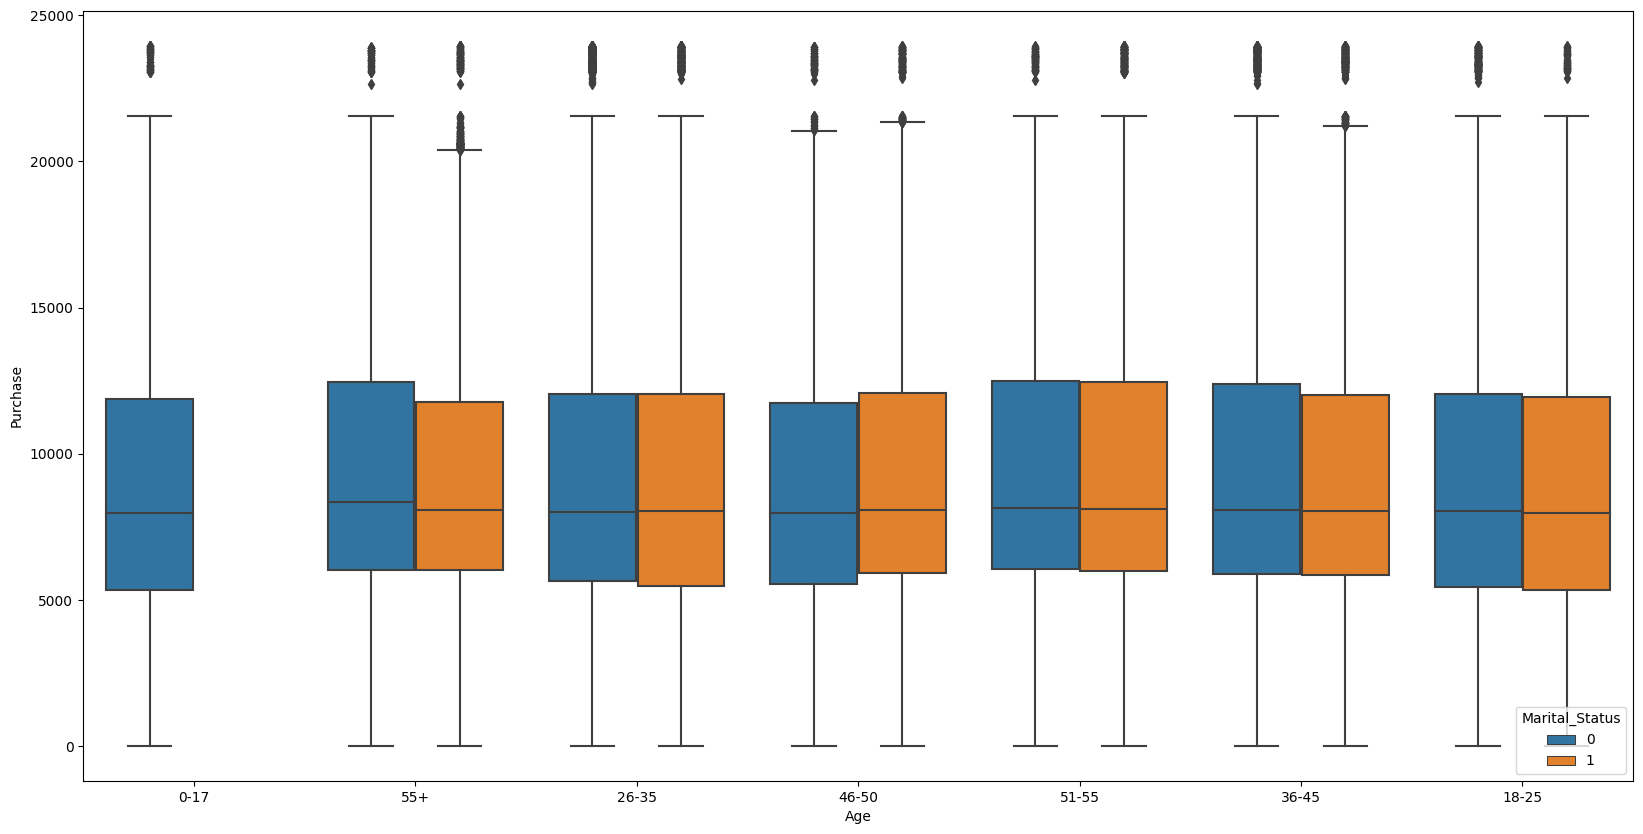

In [ ]:
# Age vs Purchase vs Marital Status
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x="Age",y="Purchase",hue="Marital_Status")

In [ ]:
# Gender vs product Sold
df2=pd.crosstab(df["Gender"],df["Product_Category"],margins=True,margins_name="Total_Transaction%",normalize=True)*100
df2.reset_index()

Product_Category,Gender,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Total_Transaction%
0,F,4.514169,1.028600,1.091865,0.661555,7.628330,0.828807,0.171433,6.100700,0.012726,...,0.278511,0.265785,0.113259,0.190158,0.436673,0.011271,0.069446,0.081990,0.131438,24.689493
1,M,21.005948,3.309773,2.582772,1.475090,19.810642,2.891824,0.505028,14.610375,0.061811,...,0.439037,0.742999,0.163616,0.953337,1.350015,0.093807,0.498666,0.209429,0.332141,75.310507
2,Total_Transaction%,25.520118,4.338373,3.674637,2.136645,27.438971,3.720631,0.676462,20.711076,0.074536,...,0.717548,1.008784,0.276875,1.143495,1.786688,0.105078,0.568112,0.291419,0.463579,100.000000


Text(0.5, 1.0, 'Marital_Status vs Purchase')

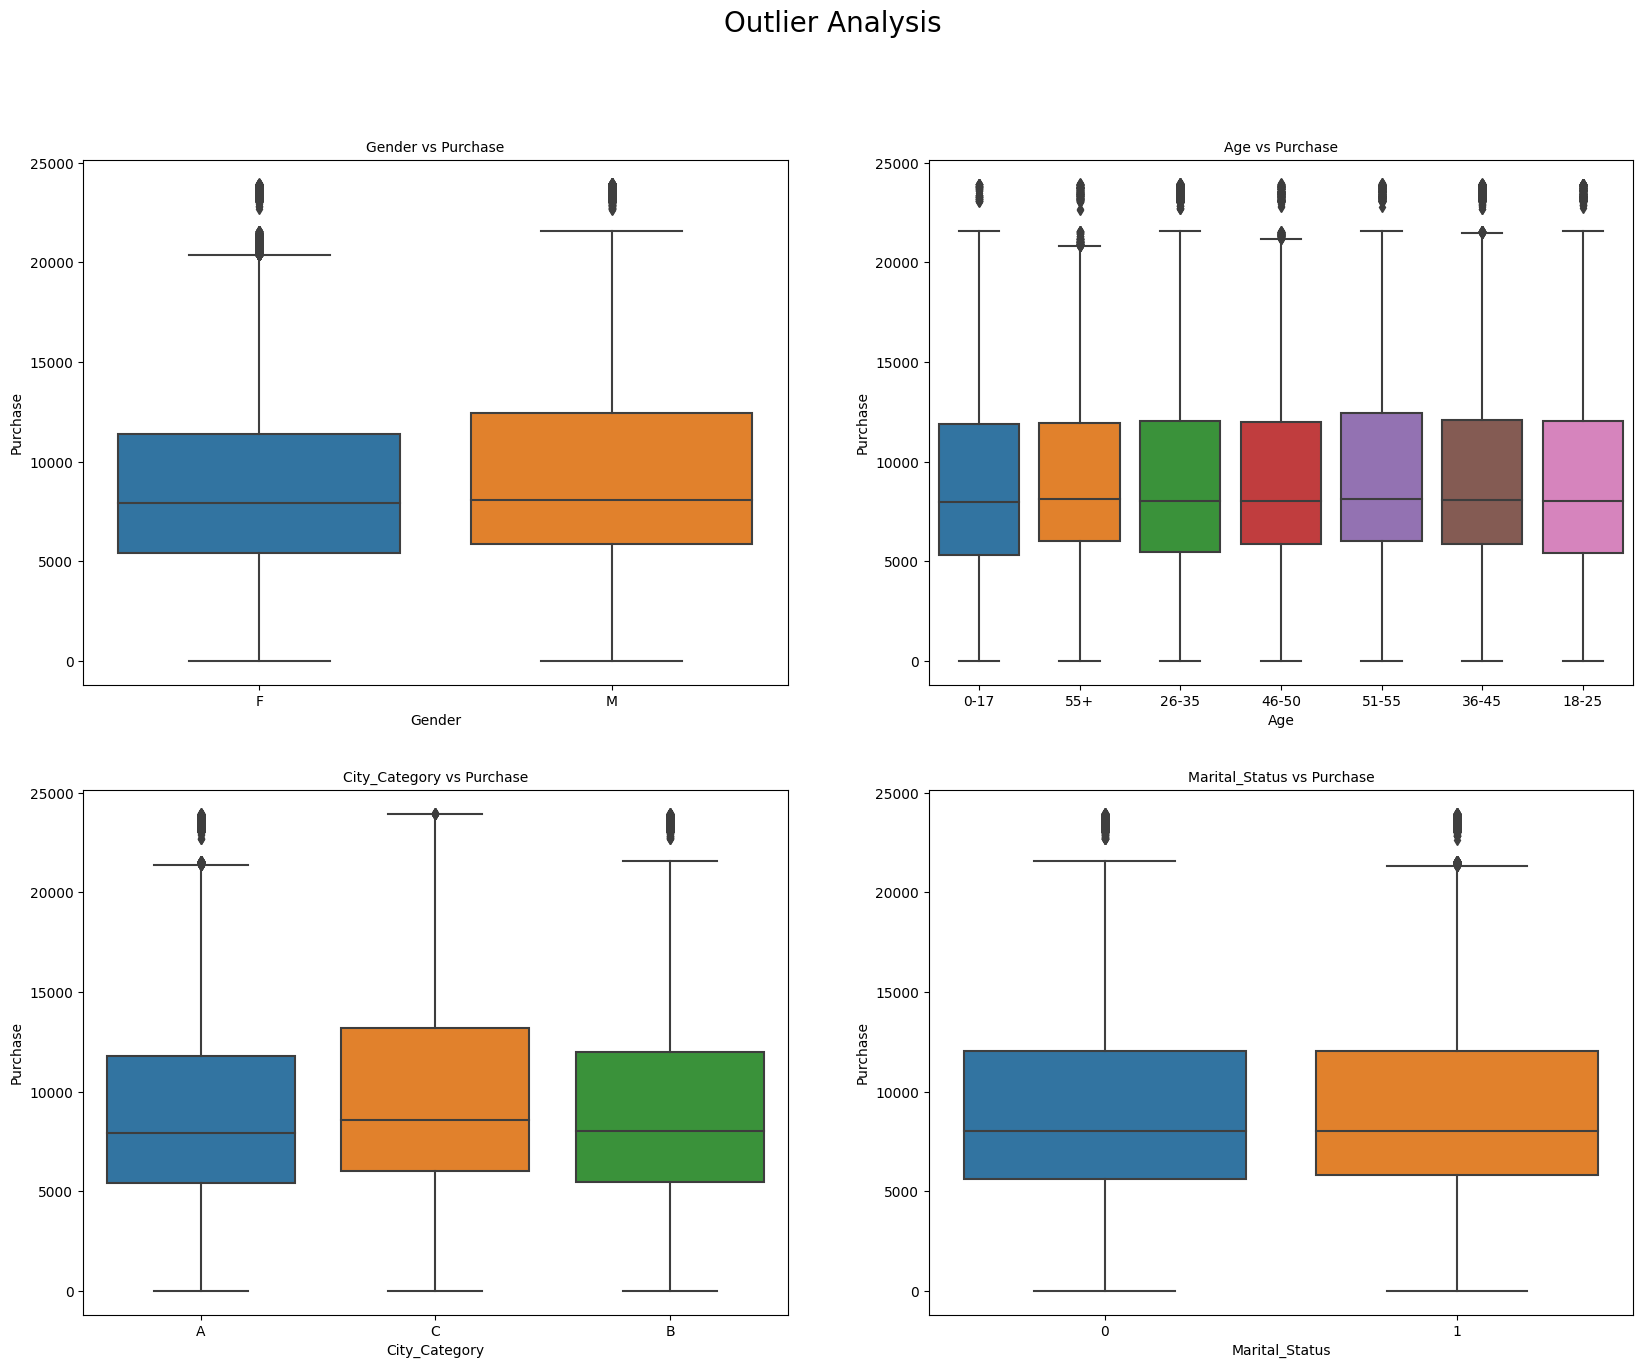

In [ ]:
#Purchase amount is the countinous variable in the data set
plt.figure(figsize=(20,15))
plt.suptitle("Outlier Analysis",fontsize=20)

plt.subplot(2,2,1)
sns.boxplot(data=df,x="Gender",y="Purchase")
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender vs Purchase",fontsize=10)

plt.subplot(2,2,2)
sns.boxplot(data=df,x="Age",y="Purchase")
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age vs Purchase",fontsize=10)

plt.subplot(2,2,3)
sns.boxplot(data=df,x="City_Category",y="Purchase")
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category vs Purchase",fontsize=10)

plt.subplot(2,2,4)
sns.boxplot(data=df,x="Marital_Status",y="Purchase")
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status vs Purchase",fontsize=10)


In [ ]:
# avg purchase by each age group
df3=df.groupby("Age")[["Purchase"]].mean()
df3.round(1).reset_index()

,Age,Purchase
0,0-17,8933.5
1,18-25,9169.7
2,26-35,9252.7
3,36-45,9331.4
4,46-50,9208.6
5,51-55,9534.8
6,55+,9336.3


In [ ]:
# avg purchase by each City_Category
df4=df.groupby("City_Category")[["Purchase"]].mean()
df4.round(1).reset_index()

,City_Category,Purchase
0,A,8911.9
1,B,9151.3
2,C,9719.9


In [ ]:
# avg purchase based on MaritalStatus
df5=df.groupby("Marital_Status")[["Purchase"]].mean()
df5.round(1).reset_index()

,Marital_Status,Purchase
0,0,9265.9
1,1,9261.2


In [ ]:
# avg purchase based on Gender
df6=df.groupby("Gender")[["Purchase"]].mean()
df6.round(1).reset_index()

,Gender,Purchase
0,F,8734.6
1,M,9437.5


### Analysis - Gender Effect on Purchase

In [ ]:
df.groupby("Gender")[["Purchase"]].describe().reset_index()

Gender  Purchase                                                           \
             count         mean          std   min     25%     50%      75%   
0      F  135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
1      M  414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            
       max  
0  23959.0  
1  23961.0

In [ ]:
male_sample_means=[df[df["Gender"]=="M"].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(male_sample_means)

9443.690113333334

In [ ]:
Female_sample_means=[df[df["Gender"]=="F"].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(Female_sample_means)

8723.876113333334

In [ ]:
#95 % CI
np.percentile(male_sample_means,[2.5,97.5]),np.percentile(Female_sample_means,[2.5,97.5])

(array([ 8868.90391667, 10006.01458333]),
 array([8188.06841667, 9258.37666667]))

In [ ]:
#90 % CI
np.percentile(male_sample_means,[5,95]),np.percentile(Female_sample_means,[5,95])

(array([8965.123     , 9939.71033333]), array([8279.769     , 9189.78616667]))

From the above,unable to conclude since there is overlap in spending behaviourin both male and female. Hence will increase the sample size to 3000

In [ ]:
male_sample_means1=[df[df["Gender"]=="M"].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(male_sample_means1)

9434.701143666667

In [ ]:
Female_sample_means1=[df[df["Gender"]=="F"].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(Female_sample_means1)

8733.954345

In [ ]:
# at 95% sample size for 3000 sample size
np.percentile(male_sample_means1,[2.5,97.5]),np.percentile(Female_sample_means1,[2.5,97.5])

(array([9247.90715833, 9616.95530833]), array([8570.53151667, 8891.06710833]))

Summary

* Confidence interval computed using the entire dataset,we were not able to conclude because of the outliers which pulls the mean value of both male and female to be in the same levels casuing overlap.hence unable to make decision
* Performed CI with sample size of 300 for 1000 iterations at 95% and 90% confidence interval,the results were same - there was overlap of levels in both male and female - hence unable to conclude
* Increased sample size to 3000 for 1000 iterations at 95% CI, there was no overlap. at 95% confidence Interval (3000 sample size) we were able to conclude that mean spending of male is more than the female
* increasing the sample size,decreases the standard error

### Analysis - maritalStatus Effect on Purchase

In [ ]:
df.groupby("Marital_Status")[["Purchase"]].describe().reset_index()

Marital_Status  Purchase                                                  \
                     count         mean          std   min     25%     50%   
0              0  324731.0  9265.907619  5027.347859  12.0  5605.0  8044.0   
1              1  225337.0  9261.174574  5016.897378  12.0  5843.0  8051.0   

                     
       75%      max  
0  12061.0  23961.0  
1  12042.0  23961.0

In [ ]:
single_sample_means=[df[df["Marital_Status"]==0].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(single_sample_means)

9277.942333333334

In [ ]:
partner_sample_means=[df[df["Marital_Status"]==1].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(partner_sample_means)

9268.995216666666

In [ ]:
#95 % CI
np.percentile(single_sample_means,[2.5,97.5]),np.percentile(partner_sample_means,[2.5,97.5])

(array([8685.267     , 9874.69041667]), array([8691.84391667, 9854.92891667]))

In [ ]:
#90 % CI
np.percentile(single_sample_means,[5,95]),np.percentile(partner_sample_means,[5,95])

(array([8808.68183333, 9789.08083333]), array([8770.095 , 9762.5405]))

In [ ]:
#85 % CI
np.percentile(single_sample_means,[7.5,92.5]),np.percentile(partner_sample_means,[7.5,92.5])

(array([8858.22841667, 9690.77558333]), array([8827.60783333, 9699.05883333]))

In [ ]:
#80 % CI
np.percentile(single_sample_means,[10,90]),np.percentile(partner_sample_means,[10,90])

(array([8902.09166667, 9643.26633333]), array([8888.548     , 9662.82533333]))

From the above,unable to conclude since there is overlap in spending behaviourin both single and patners. Hence will increase the sample size to 3000

In [ ]:
single_sample_means1=[df[df["Marital_Status"]==0].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(single_sample_means1)

9262.904726

In [ ]:
partner_sample_means1=[df[df["Marital_Status"]==1].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(partner_sample_means1)

9258.439870999999

In [ ]:
#95 % CI
np.percentile(single_sample_means1,[2.5,97.5]),np.percentile(partner_sample_means1,[2.5,97.5])

(array([9074.8035    , 9442.72269167]), array([9077.5375    , 9442.42450833]))

In [ ]:
#90 % CI
np.percentile(single_sample_means1,[5,95]),np.percentile(partner_sample_means1,[5,95])

(array([9112.17013333, 9409.30581667]), array([9101.25716667, 9411.4453    ]))

In [ ]:
#85 % CI
np.percentile(single_sample_means1,[7.5,92.5]),np.percentile(partner_sample_means1,[7.5,92.5])

(array([9128.30551667, 9388.95949167]), array([9127.66715   , 9390.94321667]))

In [ ]:
#80 % CI
np.percentile(single_sample_means1,[10,90]),np.percentile(partner_sample_means1,[10,90])

(array([9143.68593333, 9373.34303333]), array([9145.5262, 9375.3241]))

From the above,unable to conclude since there is overlap in spending behaviourin both single and patners. Hence will increase the sample size to 30000

In [ ]:
single_sample_means2=[df[df["Marital_Status"]==0].sample(30000,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(single_sample_means2)

9264.857428766665

In [ ]:
partner_sample_means2=[df[df["Marital_Status"]==1].sample(30000,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(partner_sample_means2)

9260.856835133332

In [ ]:
#95 % CI
np.percentile(single_sample_means2,[2.5,97.5]),np.percentile(partner_sample_means2,[2.5,97.5])

(array([9208.84205417, 9319.29298   ]), array([9206.36379833, 9314.39328667]))

In [ ]:
#90 % CI
np.percentile(single_sample_means2,[5,95]),np.percentile(partner_sample_means2,[5,95])

(array([9217.72676667, 9311.31809333]), array([9214.61955   , 9307.27336167]))

In [ ]:
#85 % CI
np.percentile(single_sample_means2,[7.5,92.5]),np.percentile(partner_sample_means2,[7.5,92.5])

(array([9223.70156167, 9307.439825  ]), array([9219.64854917, 9302.24977583]))

In [ ]:
#80 % CI
np.percentile(single_sample_means2,[10,90]),np.percentile(partner_sample_means2,[10,90])

(array([9227.79891333, 9302.76173333]), array([9225.55637667, 9298.19304667]))

From the above,unable to conclude since there is overlap in spending behaviourin both single and patners. Hence will increase the sample size to 60000

In [ ]:
single_sample_means3=[df[df["Marital_Status"]==0].sample(60000,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(single_sample_means3)

9265.950465266667

In [ ]:
partner_sample_means3=[df[df["Marital_Status"]==1].sample(60000,replace=True)["Purchase"].mean() for i in range(1000)]
np.mean(partner_sample_means3)

9261.004074483333

In [ ]:
#95 % CI
np.percentile(single_sample_means3,[2.5,97.5]),np.percentile(partner_sample_means3,[2.5,97.5])

(array([9225.68228208, 9309.93727667]), array([9220.82211708, 9302.5334275 ]))

In [ ]:
#90 % CI
np.percentile(single_sample_means3,[5,95]),np.percentile(partner_sample_means3,[5,95])

(array([9231.95237917, 9301.3048775 ]), array([9226.62737833, 9295.3722125 ]))

In [ ]:
#85 % CI
np.percentile(single_sample_means3,[7.5,92.5]),np.percentile(partner_sample_means3,[7.5,92.5])

(array([9236.02965708, 9296.70611875]), array([9231.836875  , 9291.37914542]))

In [ ]:
#80 % CI
np.percentile(single_sample_means3,[10,90]),np.percentile(partner_sample_means3,[10,90])

(array([9239.193165  , 9293.38806333]), array([9234.22380667, 9288.06576667]))

Summary

* Performed CI with sample size of 300 for 1000 iterations at 95%,90%,85%,80% confidence interval,the results were same - there was overlap of levels in both single and partners - hence unable to conclude
* Increased sample size to 3000 for 1000 iterations at 95%,90%,85%,80%  CI - there was overlap of levels in both single and partners - hence unable to conclude
* Increased sample size to 30000 for 1000 iterations at 95%,90%,85%,80%  CI - there was overlap of levels in both single and partners - hence unable to conclude
* Increased sample size to 60000 for 1000 iterations at 95%,90%,85%,80%  CI - there was overlap of levels in both single and partners - hence unable to conclude

**hence, the average spending between both the single and partners is same**

### Analysis - Age Effect on Purchase

In [ ]:
df.groupby("Age")[["Purchase"]].describe().reset_index()

Age  Purchase                                                           \
             count         mean          std   min     25%     50%      75%   
0   0-17   15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
1  18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
2  26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
3  36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
4  46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
5  51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
6    55+   21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

            
       max  
0  23955.0  
1  23958.0  
2  23961.0  
3  23960.0  
4  23960.0  
5  23960.0  
6  23960.0

In [ ]:
Age=['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
Age_sample_means1=[df[df["Age"]=='0-17'].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
Age_sample_means2=[df[df["Age"]=='18-25'].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
Age_sample_means3=[df[df["Age"]=='26-35'].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
Age_sample_means4=[df[df["Age"]=='36-45'].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
Age_sample_means5=[df[df["Age"]=='46-50'].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
Age_sample_means6=[df[df["Age"]=='51-55'].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]
Age_sample_means7=[df[df["Age"]=='55+'].sample(300,replace=True)["Purchase"].mean() for i in range(1000)]


In [ ]:
np.mean(Age_sample_means1),np.mean(Age_sample_means2),np.mean(Age_sample_means3),np.mean(Age_sample_means4),np.mean(Age_sample_means5),np.mean(Age_sample_means6),np.mean(Age_sample_means7)

(8919.109559999999,
 9179.78536,
 9258.89828,
 9342.596529999999,
 9209.065746666665,
 9545.727406666667,
 9353.929413333333)

In [ ]:
#95 % CI
np.percentile(Age_sample_means1,[2.5,97.5]),np.percentile(Age_sample_means2,[2.5,97.5]),np.percentile(Age_sample_means3,[2.5,97.5]),np.percentile(Age_sample_means4,[2.5,97.5]),np.percentile(Age_sample_means5,[2.5,97.5]),np.percentile(Age_sample_means6,[2.5,97.5]),np.percentile(Age_sample_means7,[2.5,97.5])

(array([8356.90633333, 9509.46841667]),
 array([8626.22241667, 9768.55716667]),
 array([8672.19591667, 9836.032     ]),
 array([8786.4305 , 9906.37475]),
 array([8640.69241667, 9760.61091667]),
 array([ 8939.51925, 10078.79925]),
 array([8819.853     , 9896.29533333]))

In [ ]:
#90 % CI
np.percentile(Age_sample_means1,[5,95]),np.percentile(Age_sample_means2,[5,95]),np.percentile(Age_sample_means3,[5,95]),np.percentile(Age_sample_means4,[5,95]),np.percentile(Age_sample_means5,[5,95]),np.percentile(Age_sample_means6,[5,95]),np.percentile(Age_sample_means7,[5,95])

(array([8453.00066667, 9403.23916667]),
 array([8702.05983333, 9664.43716667]),
 array([8786.28      , 9747.03916667]),
 array([8874.18383333, 9811.29033333]),
 array([8733.3       , 9677.89716667]),
 array([9091.06916667, 9982.42066667]),
 array([8905.82983333, 9803.47016667]))

From the above,unable to conclude since there is overlap in spending behaviour in all age groups. Hence will increase the sample size to 3000

In [ ]:
A_sample_means1=[df[df["Age"]=='0-17'].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
A_sample_means2=[df[df["Age"]=='18-25'].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
A_sample_means3=[df[df["Age"]=='26-35'].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
A_sample_means4=[df[df["Age"]=='36-45'].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
A_sample_means5=[df[df["Age"]=='46-50'].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
A_sample_means6=[df[df["Age"]=='51-55'].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]
A_sample_means7=[df[df["Age"]=='55+'].sample(3000,replace=True)["Purchase"].mean() for i in range(1000)]


In [ ]:
np.mean(A_sample_means1),np.mean(A_sample_means2),np.mean(A_sample_means3),np.mean(A_sample_means4),np.mean(A_sample_means5),np.mean(A_sample_means6),np.mean(A_sample_means7)

(8932.244339666666,
 9165.737697333332,
 9253.742483666667,
 9329.928502666668,
 9211.309934,
 9536.564241333335,
 9330.796030666666)

In [ ]:
#95 % CI
np.percentile(A_sample_means1,[2.5,97.5]),np.percentile(A_sample_means2,[2.5,97.5]),np.percentile(A_sample_means3,[2.5,97.5]),np.percentile(A_sample_means4,[2.5,97.5]),np.percentile(A_sample_means5,[2.5,97.5]),np.percentile(A_sample_means6,[2.5,97.5]),np.percentile(A_sample_means7,[2.5,97.5])

(array([8755.90575   , 9110.10908333]),
 array([8983.833475  , 9340.84489167]),
 array([9074.54126667, 9422.06300833]),
 array([9152.49695833, 9508.678475  ]),
 array([9040.11918333, 9378.45751667]),
 array([9362.527025  , 9718.58124167]),
 array([9138.142125  , 9511.98158333]))

In [ ]:
#90 % CI
np.percentile(A_sample_means1,[5,95]),np.percentile(A_sample_means2,[5,95]),np.percentile(A_sample_means3,[5,95]),np.percentile(A_sample_means4,[5,95]),np.percentile(A_sample_means5,[5,95]),np.percentile(A_sample_means6,[5,95]),np.percentile(A_sample_means7,[5,95])

(array([8780.06366667, 9077.40438333]),
 array([9011.33006667, 9317.70585   ]),
 array([9105.23776667, 9395.8005    ]),
 array([9177.18295, 9479.80225]),
 array([9066.05701667, 9355.89848333]),
 array([9386.58116667, 9698.55355   ]),
 array([9185.23765   , 9483.36388333]))

From the above,unable to conclude since there is overlap in spending behaviour in all age groups. Hence will increase the sample size to 30000

In [ ]:
AA_sample_means1=[df[df["Age"]=='0-17'].sample(30000,replace=True)["Purchase"].mean() for i in range(1000)]
AA_sample_means2=[df[df["Age"]=='18-25'].sample(30000,replace=True)["Purchase"].mean() for i in range(1000)]
AA_sample_means3=[df[df["Age"]=='26-35'].sample(30000,replace=True)["Purchase"].mean() for i in range(1000)]
AA_sample_means4=[df[df["Age"]=='36-45'].sample(30000,replace=True)["Purchase"].mean() for i in range(1000)]
AA_sample_means5=[df[df["Age"]=='46-50'].sample(30000,replace=True)["Purchase"].mean() for i in range(1000)]
AA_sample_means6=[df[df["Age"]=='51-55'].sample(30000,replace=True)["Purchase"].mean() for i in range(1000)]
AA_sample_means7=[df[df["Age"]=='55+'].sample(30000,replace=True)["Purchase"].mean() for i in range(1000)]


In [ ]:
np.mean(AA_sample_means1),np.mean(AA_sample_means2),np.mean(AA_sample_means3),np.mean(AA_sample_means4),np.mean(AA_sample_means5),np.mean(AA_sample_means6),np.mean(AA_sample_means7)

(8935.631737299998,
 9169.108118433334,
 9251.8010352,
 9331.99741,
 9207.4460253,
 9534.408188200001,
 9335.489999166666)

In [ ]:
#95 % CI
np.percentile(AA_sample_means1,[2.5,97.5]),np.percentile(AA_sample_means2,[2.5,97.5]),np.percentile(AA_sample_means3,[2.5,97.5]),np.percentile(AA_sample_means4,[2.5,97.5]),np.percentile(AA_sample_means5,[2.5,97.5]),np.percentile(AA_sample_means6,[2.5,97.5]),np.percentile(AA_sample_means7,[2.5,97.5])

(array([8879.51628083, 8993.2077175 ]),
 array([9114.79107833, 9225.25558167]),
 array([9194.59191583, 9306.2762925 ]),
 array([9276.31115667, 9391.63895583]),
 array([9152.72563   , 9264.52189167]),
 array([9478.2452525 , 9589.70895083]),
 array([9274.81658833, 9394.56554083]))

In [ ]:
#90 % CI
np.percentile(AA_sample_means1,[5,95]),np.percentile(AA_sample_means2,[5,95]),np.percentile(AA_sample_means3,[5,95]),np.percentile(AA_sample_means4,[5,95]),np.percentile(AA_sample_means5,[5,95]),np.percentile(AA_sample_means6,[5,95]),np.percentile(AA_sample_means7,[5,95])

(array([8888.31367167, 8983.72094833]),
 array([9122.218255  , 9216.20758167]),
 array([9202.88832167, 9298.718295  ]),
 array([9283.40485167, 9380.62867667]),
 array([9163.26470833, 9251.92343667]),
 array([9486.40965833, 9580.891495  ]),
 array([9285.43345667, 9383.14122833]))

In [ ]:
#85 % CI
np.percentile(AA_sample_means1,[7.5,92.5]),np.percentile(AA_sample_means2,[7.5,92.5]),np.percentile(AA_sample_means3,[7.5,92.5]),np.percentile(AA_sample_means4,[7.5,92.5]),np.percentile(AA_sample_means5,[7.5,92.5]),np.percentile(AA_sample_means6,[7.5,92.5]),np.percentile(AA_sample_means7,[7.5,92.5])

(array([8893.8961775 , 8976.96336917]),
 array([9127.40841083, 9210.48043333]),
 array([9210.4611575 , 9291.88125667]),
 array([9287.77278417, 9375.83255417]),
 array([9166.7632725, 9246.975225 ]),
 array([9493.04699417, 9574.2166575 ]),
 array([9290.58984   , 9378.37442667]))

In [ ]:
#80 % CI
np.percentile(AA_sample_means1,[10,90]),np.percentile(AA_sample_means2,[10,90]),np.percentile(AA_sample_means3,[10,90]),np.percentile(AA_sample_means4,[10,90]),np.percentile(AA_sample_means5,[10,90]),np.percentile(AA_sample_means6,[10,90]),np.percentile(AA_sample_means7,[10,90])

(array([8898.84101333, 8972.02069333]),
 array([9131.76232333, 9204.89802667]),
 array([9215.41011333, 9287.00897333]),
 array([9292.90263, 9370.36023]),
 array([9170.93487667, 9243.83333333]),
 array([9497.04422667, 9570.83493   ]),
 array([9294.81619333, 9374.1977    ]))

Summary

* Performed CI with sample size of 300 for 1000 iterations at 95%,90% confidence interval,the results were same - there was overlap of spending in all age groups - hence unable to conclude
* Increased sample size to 3000 for 1000 iterations at 95%,90% CI - there was overlap of spending in all age groups - hence unable to conclude
* Increased sample size to 30000 for 1000 iterations at 95%,90%,85%,80% CI - not all age groups have overlap.hence the population is the same as sample

Hence 95% confidence level,the age group 51-55 spends the most and (0-17) the least.netween 18-50 the spending habit is almost the same

### Summary

* On 95% Confidence Interval, we can conclude that men average spending is more than the females.hence walmart must focus on women products to improve the avg spending either through offers,discounts,advertising to increase footfalls

* Interms of Marital status, there is no significant change in terms of spending.hence walmart can target the audiences based on these aspect to improve their spending, hence increase in sales for the business

* Interms of Age group, there is slight significant change interms of spending at 80% Confidence interval between the age groups. age group(50-55) spends the most and agegroup(0-17) is the least.overall it remains same between age(18-40).

Here there is good opporuntiy for walmart to club the marital status and age groups to create a criteria levels and do target producting sales,which will drive their revenue and improve the consumer spending